# Survival analysis - tests of implemented methods
Data come from the following review : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1065034/pdf/cc2955.pdf 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data reading and preprocessing

### Reading

In [10]:
df = pd.read_excel('data/SurvivalAnalysisReview.xlsx')
df

,patientNumber,survivalTime,outcome,treatment,age
0,1,1,died,2,75
1,2,1,died,2,79
2,3,4,died,2,85
3,4,5,died,2,76
4,5,6,unknown,2,66
5,6,8,died,1,75
6,7,9,survived,2,72
7,8,9,died,2,70
8,9,12,died,1,71
9,10,15,unknown,1,73


### Update outcome to dead_status
outcome = True if the patient is dead.
outcome = False if the patient has survived or if it's unknown.

In [11]:
df.loc[df['outcome'] == 'died','outcome'] = True
df.loc[df['outcome'] != True,'outcome'] = False
df

,patientNumber,survivalTime,outcome,treatment,age
0,1,1,True,2,75
1,2,1,True,2,79
2,3,4,True,2,85
3,4,5,True,2,76
4,5,6,False,2,66
5,6,8,True,1,75
6,7,9,False,2,72
7,8,9,True,2,70
8,9,12,True,1,71
9,10,15,False,1,73


## Computing useful features for analysis

In [12]:
# from survivalAnalysis.SurvivalFeatures import SurvivalFeatures

# features_calculator = SurvivalFeatures(df['survivalTime'],df['outcome'],df['treatment'],df['age'])
# d = features_calculator.compute_death_number()
# r = features_calculator.compute_alive_number(d)
# r1, r2 = features_calculator.compute_alive_number_per_group()

## 1. Get the survival function with the Kaplan-Meier Method.

### Computing of the survival function

In [13]:
from survivalAnalysis.KaplanMeier import KaplanMeier

# Formatting data for Kaplan-Meier model
data_km = np.array(list((df[['outcome','survivalTime']].itertuples(index=False, name=None))),dtype=[('outcome', '?'), ('survivalTime', '<f8')])

# Computing
km_model = KaplanMeier(data_km['outcome'],data_km['survivalTime'])
time, survival_prob = km_model.estimate_survival_function()

### Plotting the result

Text(0.5, 1.0, 'Survival curve using KM estimator')

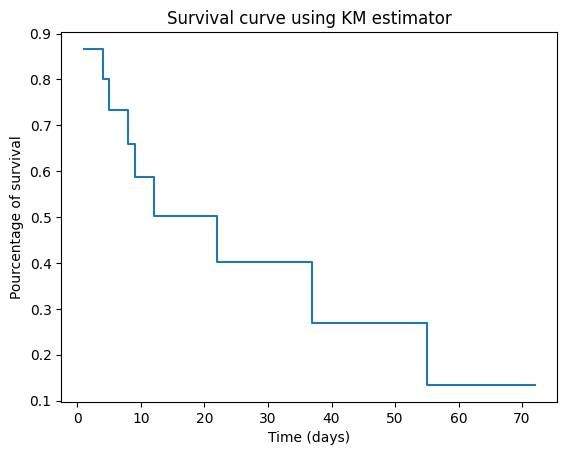

In [14]:
plt.step(time, survival_prob, where='post') #fonction en escalier
plt.ylabel("Pourcentage of survival")
plt.xlabel("Time (days)")
plt.title('Survival curve using KM estimator')

## 2. Log-Rank Test

In [15]:
from survivalAnalysis.LogRankTest import LogRankTest

logrank_model = LogRankTest(df['outcome'],df['survivalTime'],df['treatment'])
p_value = logrank_model.stat_test()
p_value

/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


0.01714208659822555

## 3. Cox Regression

In [20]:
from survivalAnalysis.CoxRegression import CoxRegression

X_cox = df[["treatment","age"]]
display(X_cox)
y_cox = data_km

cox_model = CoxRegression()
hazard_function = cox_model.compute_hazard_function(X_cox, y_cox)
hazard_function

,treatment,age
0,2,75
1,2,79
2,2,85
3,2,76
4,2,66
5,1,75
6,2,72
7,2,70
8,1,71
9,1,73


array([StepFunction(x=array([ 1.,  4.,  5.,  6.,  8.,  9., 12., 15., 22., 25., 37., 55., 72.]), y=array([1.99276676e-10, 3.27548331e-10, 8.67360941e-10, 8.67360941e-10,
              1.92634012e-09, 3.10991437e-09, 6.58044220e-09, 6.58044220e-09,
              1.20451010e-08, 1.20451010e-08, 4.68560939e-08, 1.80718817e-07,
              1.80718817e-07]), a=656135772.9248583, b=0.0)                                                                                                             ,
       StepFunction(x=array([ 1.,  4.,  5.,  6.,  8.,  9., 12., 15., 22., 25., 37., 55., 72.]), y=array([1.99276676e-10, 3.27548331e-10, 8.67360941e-10, 8.67360941e-10,
              1.92634012e-09, 3.10991437e-09, 6.58044220e-09, 6.58044220e-09,
              1.20451010e-08, 1.20451010e-08, 4.68560939e-08, 1.80718817e-07,
              1.80718817e-07]), a=1584207132.9839184, b=0.0)                                                                                                            ,
       Ste